In [1]:
import pathview
import json
from pathsim.blocks import Scope
import matplotlib.pyplot as plt
import numpy as np

# read graph data from a JSON file
with open("festim.json", "r") as f:
    graph_data = json.load(f)

model, duration = pathview.make_pathsim_model(graph_data)

model.run(duration)

0.001 <class 'str'>
1e-16 <class 'str'>
1e-10 <class 'str'>
200 <class 'str'>
1 <class 'str'>
16:11:06 - INFO - LOGGING (log: True)
16:11:06 - INFO - BLOCKS (total: 4, dynamic: 0, static: 4, eventful: 1)
16:11:06 - INFO - GRAPH (nodes: 4, edges: 3, alg. depth: 2, loop depth: 0, runtime: 0.035ms)
16:11:06 - INFO - STARTING -> TRANSIENT (Duration: 1.00s)
1.0 0.0
-27.1684247559885 1.0414936008434077e-12
1.0 0.0
-15.546971909773257 1.717990603981092e-11
1.0 0.0
-11.777532128434448 1.4601691712732148e-10
1.0 0.0
-9.840762255679603 8.526218074285177e-10
1.0 0.0
-8.620850101829365 3.847975972097954e-09
1.0 0.0
-7.763916087374647 1.4316754179915814e-08
1.0 0.0
-7.119943950977373 4.573965360344209e-08
1.0 0.0
-6.613324435941715 1.290533713401077e-07
1.0 0.0
-6.2013334723519735 3.2822656318997524e-07
1.0 0.0
-5.857785356647913 7.643252081408086e-07
16:11:06 - INFO - --------------------   1% | 0.1s<6.5s | 152.4 it/s


/home/remidm/miniconda3/envs/fuel-cycle-paper/lib/python3.14/site-packages/festim/coupled_heat_hydrogen_problem.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  import tqdm.autonotebook


1.0 0.0
-5.565624627947234 1.6496780030729291e-06
1.0 0.0
-5.313205085967048 3.332824072515631e-06
1.0 0.0
-5.092267833973498 6.3536463073903306e-06
1.0 0.0
-4.896772024447983 1.1506673048327318e-05
1.0 0.0
-4.722183674884954 1.9909215997498233e-05
1.0 0.0
-4.565024608507456 3.307002747521053e-05
1.0 0.0
-4.422576104097642 5.2953658662540734e-05
1.0 0.0
-4.292678231920364 8.203574080397034e-05
1.0 0.0
-4.173590391490035 0.00012334495900488319
1.0 0.0
-4.06389215196674 0.00018048843664056325
1.0 0.0
-3.962411318869963 0.00025765844933823054
1.0 0.0
-3.8681708130595327 0.0003596196825456498
1.0 0.0
-3.780348811890652 0.000491677492594782
1.0 0.0
-3.6982484096355477 0.0006596287163991687
1.0 0.0
-3.621274222333231 0.0008696974270604498
1.0 0.0
-3.548914133693643 0.0011284586180031325
1.0 0.0
-3.4807248982595307 0.001442753116254761
1.0 0.0
-3.416320674232916 0.0018195971004219631
1.0 0.0
-3.35536380656642 0.002266089470927148
1.0 0.0
-3.297557356445714 0.0027893200369918185
1.0 0.0
-3.242

{'total_steps': 1000,
 'successful_steps': 1000,
 'runtime_ms': 6630.613278946839}

In [2]:
import morethemes as mt
mt.set_theme("lighter")

In [3]:
def downstream_flux(t, c_up, D, L):
    n_array = np.arange(1, 10000)[:, np.newaxis]
    summation = np.sum((-1)**n_array * np.exp(-(np.pi * n_array)**2 * D/L**2 * t), axis=0)
    return c_up * D / L * (2*summation + 1)

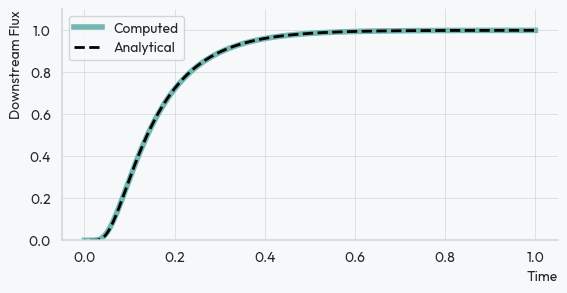

In [4]:
scopes = [block for block in model.blocks if isinstance(block, Scope)]
assert len(scopes) == 1, "This script assumes there is only one scope."
scope = scopes[0]

sim_time, data = scope.read()
rc = plt.rcParams
plt.figure(figsize=(rc["figure.figsize"][0], 3))
for p, d in enumerate(data):
    plt.plot(sim_time, d, label="Computed", linewidth=4)

time = np.linspace(0, duration, 1000)
plt.plot(time, downstream_flux(time, D=1.0, c_up=1, L=1), 'k--', label="Analytical", linewidth=2)
plt.ylim(bottom=0)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Downstream Flux")
plt.savefig("festim_analytical_comparison.pdf", bbox_inches='tight')
plt.show()

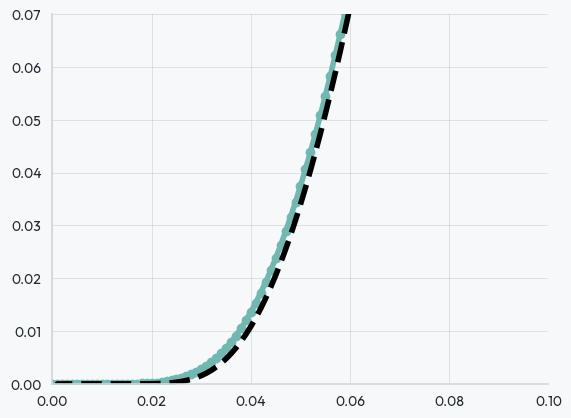

In [5]:

for i, scope in enumerate(scopes):
    sim_time, data = scope.read()
    for p, d in enumerate(data):
        lb = scope.labels[p] if p < len(scope.labels) else f"port {p}"
        plt.plot(sim_time, d, label=lb, linewidth=4, marker='o')

time = np.linspace(0, duration, 1000)
plt.plot(time, downstream_flux(time, D=1.0, c_up=1, L=1), 'k--', label="Analytical", linewidth=4)
plt.ylim(bottom=0, top=0.07)
plt.xlim(left=0, right=0.1)
plt.show()

In [6]:
# print(d)
np.diff(d)

array([1.04149360e-12, 1.61384124e-11, 1.28837011e-10, 7.06604890e-10,
       2.99535416e-09, 1.04687782e-08, 3.14228994e-08, 8.33137177e-08,
       1.99173192e-07, 4.36098645e-07, 8.85352795e-07, 1.68314607e-06,
       3.02082223e-06, 5.15302674e-06, 8.40254295e-06, 1.31608115e-05,
       1.98836312e-05, 2.90820821e-05, 4.13092182e-05, 5.71434776e-05,
       7.71700127e-05, 1.01961233e-04, 1.32057810e-04, 1.67951224e-04,
       2.10068711e-04, 2.58761191e-04, 3.14294498e-04, 3.76843984e-04,
       4.46492371e-04, 5.23230566e-04, 6.06961059e-04, 6.97503432e-04,
       7.94601535e-04, 8.97931844e-04, 1.00711257e-03, 1.12171317e-03,
       1.24126382e-03, 1.36526480e-03, 1.49319526e-03, 1.62452152e-03,
       1.75870458e-03, 1.89520688e-03, 2.03349824e-03, 2.17306093e-03,
       2.31339405e-03, 2.45401702e-03, 2.59447243e-03, 2.73432827e-03,
       2.87317942e-03, 3.01064881e-03, 3.14638792e-03, 3.28007703e-03,
       3.41142502e-03, 3.54016894e-03, 3.66607332e-03, 3.78892926e-03,
      

In [18]:
import json
import pathview

# read graph data from a JSON file
with open("depleted_source.json", "r") as f:
    graph_data = json.load(f)

model, duration = pathview.make_pathsim_model(graph_data)

model.run(duration)

dt <class 'str'>
1e-16 <class 'str'>
1e-10 <class 'str'>
200 <class 'str'>
140 <class 'str'>
16:21:43 - INFO - LOGGING (log: True)
16:21:43 - INFO - BLOCKS (total: 7, dynamic: 1, static: 6, eventful: 1)
16:21:43 - INFO - GRAPH (nodes: 7, edges: 7, alg. depth: 4, loop depth: 0, runtime: 0.042ms)
16:21:43 - INFO - STARTING -> TRANSIENT (Duration: 140.00s)
3.0526759376316897e+25 0.0
-1314535545092943.2 851.9352828368447
2.926264402534956e+25 0.0
-690092659086781.9 12780.469147981214
2.8599020491396517e+25 0.0
-503781648023599.0 99092.29576006555
2.811456184196743e+25 0.0
-410003136807246.1 529457.3695320182
2.7720284744541236e+25 0.0
-351465903864502.75 2193109.8908427637
2.738229963179534e+25 0.0
-310594119504593.25 7511495.836824162
2.6784937626862744e+25 0.0
-267168091489111.47 22156944.632384118
2.6528017008016983e+25 0.0
-249336357477097.9 57886888.59916764
2.628824417097377e+25 0.0
-231767184438505.56 136713446.86720225
2.6065366625522176e+25 0.0
-216574893792181.03 296446498.253441

{'total_steps': 2801,
 'successful_steps': 2801,
 'runtime_ms': 24962.47508795932}

In [19]:
# get variables from graph data
# Execute python code first to define any variables that blocks might need
eval_namespace = {}
python_code = graph_data.get("pythonCode", "")
if python_code:
    exec(python_code, eval_namespace)

eval_namespace

{'__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, types, exceptions, and other objects.\n\nThis module provides direct access to all 'built-in'\nidentifiers of Python; for example, builtins.len is\nthe full name for the built-in function len().\n\nThis module is not normally accessed explicitly by most\napplications, but can be useful in modules that provide\nobjects with the same name as a built-in value, but in\nwhich the built-in of that name is also needed.",
  '__package__': '',
  '__loader__': _frozen_importlib.BuiltinImporter,
  '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>, origin='built-in'),
  '__build_class__': <function __build_class__>,
  '__import__': <function __import__(name, globals=None, locals=None, fromlist=(), level=0)>,
  'abs': <function abs(x, /)>,
  'all': <function all(iterable, /)>,
  'any': <function any(iterable, /)>,
  'ascii': <function ascii(obj, /)>,
  'bin': <function bin(number, /)

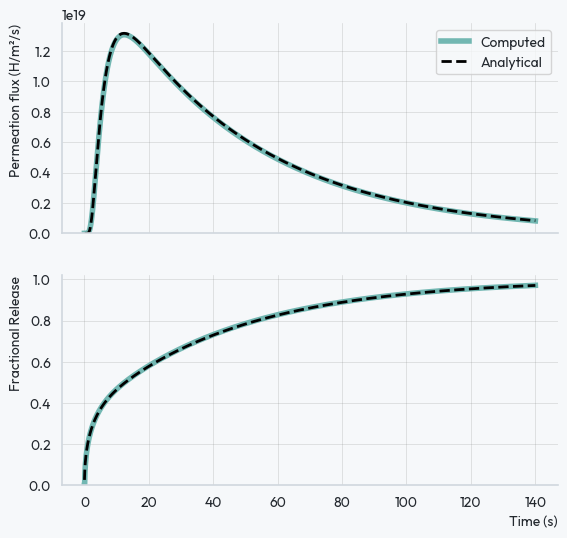

In [26]:
from analytical_solution_depleted_source import analytical_expression_flux, analytical_expression_fractional_release_TMAP7

scopes = [block for block in model.blocks if isinstance(block, Scope)]
scope_flux = scopes[1]
scope_pressure = scopes[0]

rc = plt.rcParams
fig, axs = plt.subplots(figsize=(rc["figure.figsize"][0], 6), nrows=2, ncols=1, sharex=True)

plt.sca(axs[0])
sim_time, data = scope_flux.read()
for p, d in enumerate(data):
    plt.plot(sim_time, d/eval_namespace["A"], label="Computed", linewidth=4)


# plot analytical
analytical_flux = analytical_expression_flux(
    sim_time,
    eval_namespace["initial_pressure"],
    eval_namespace["diffusivity"],
    eval_namespace["solubility"],
    eval_namespace["V"],
    eval_namespace["temperature"],
    eval_namespace["A"],
    eval_namespace["l"],
)
plt.plot(sim_time, analytical_flux, 'k--', label="Analytical", linewidth=2)
plt.ylabel("Permeation flux (H/m²/s)")

plt.ylim(bottom=0)
plt.legend()


plt.sca(axs[1])

sim_time, data = scope_pressure.read()
pressures = data[0]
fractional_release = 1 - pressures / eval_namespace["initial_pressure"]

plt.plot(sim_time, fractional_release, label="Computed", linewidth=4)

analytical_fr = analytical_expression_fractional_release_TMAP7(
    t=sim_time,
    P_0=eval_namespace["initial_pressure"],
    D=eval_namespace["diffusivity"],
    S=eval_namespace["solubility"],
    V=eval_namespace["V"],
    T=eval_namespace["temperature"],
    A=eval_namespace["A"],
    l=eval_namespace["l"],
)
plt.plot(sim_time, analytical_fr, 'k--', linewidth=2)

plt.ylim(bottom=0)
plt.xlabel("Time (s)")
plt.ylabel("Fractional Release")
plt.savefig("depleted_source_analytical_comparison.pdf", bbox_inches='tight')
plt.show()